# Finding the Best Location for a New MIU Department

### Importing the dataset

In [1]:
# Checking if you are in the right environment
import sys
print(sys.executable)

c:\Users\glauc\Desktop\PHS\env_phs\Scripts\python.exe


In [2]:
# Loading the dataset. Takes around 2 minutes

import pandas as pd
file_path = "../data/dataset/OR_AE2_Project_Adjusted.xlsx"
df_original = pd.read_excel(file_path, engine='openpyxl')
df_original.head()

,Site_Code,Site_Type,Site_X,Site_Y,Site_Loc_GPs,Site_Loc_GP_List,Site_Pop_20miles,Pat_X,Pat_Y,Pat_Loc_GPs,Pat_Loc_GP_List,Drive_Distance_Miles,Driving_Time_mins,Attendance_Type,Age_Group,Wait_Time,Year,Month,Number_Of_Attendances
0,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,00 to 05,New - unplanned,20-39,00-29,1,2,1
1,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,00 to 05,New - unplanned,20-39,00-29,1,3,2
2,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,00 to 05,New - unplanned,20-39,00-29,1,4,3
3,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,00 to 05,New - unplanned,20-39,00-29,1,5,3
4,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,00 to 05,New - unplanned,20-39,00-29,1,6,2


### Preprocessing

Each row represents a class of patients who share the same covariates. The number of patients sharing these values is stored in the variable 'Number_Of_Attendances'. We therefore create a new, extended dataset where each row corresponds to a single patient by replicating each row according to the value stored in 'Number_Of_Attendances'. We then remove this variable from the dataset.

In [3]:
df = df_original.loc[df_original.index.repeat(df_original['Number_Of_Attendances'])].reset_index(drop=True)
df = df.drop(columns=['Number_Of_Attendances'])
print(f"New lenght of the dataset {len(df)}")
df.head()

New lenght of the dataset 1811942


,Site_Code,Site_Type,Site_X,Site_Y,Site_Loc_GPs,Site_Loc_GP_List,Site_Pop_20miles,Pat_X,Pat_Y,Pat_Loc_GPs,Pat_Loc_GP_List,Drive_Distance_Miles,Driving_Time_mins,Attendance_Type,Age_Group,Wait_Time,Year,Month
0,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,00 to 05,New - unplanned,20-39,00-29,1,2
1,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,00 to 05,New - unplanned,20-39,00-29,1,3
2,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,00 to 05,New - unplanned,20-39,00-29,1,3
3,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,00 to 05,New - unplanned,20-39,00-29,1,4
4,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,00 to 05,New - unplanned,20-39,00-29,1,4


### Handling with Categorical Variables

The following code transforms two categorical variables (Driving_Time_mins and Wait_Time) into numerical variables with uniformly distributed values within specified ranges

In [4]:
import numpy as np

range_mapping = {
    '00-29': (0, 29),
    '30-59': (30, 59),
    '60-89': (60, 89),
    '90-119': (90, 119),
    '120-149': (120, 149),
    '150-179': (150, 179),
    '180-209': (180, 209),
    '210-239': (210, 239),
    '240-269': (240, 269),
    '270-299': (270, 299),
    '300-329': (300, 329),
    '360+': (360, 420)
}

time_mapping = {
    '00 to 05': (0, 5),
    '05 to 10': (5, 10),
    '10 to 15': (10, 15),
    '15 to 20': (15, 20),
    '20 to 25': (20, 25),
    '25 to 30': (25, 30),
    '30 to 35': (30, 35),
    '35 to 40': (35, 40),
    '40 to 45': (40, 45),
    '45 to 50': (45, 50),
    '50 to 55': (50, 55),
    '55 to 60': (55, 60),
    '60 to 65': (60, 65),
    '65 to 70': (65, 70),
    '70 to 75': (70, 75),
    '75 to 80': (75, 80),
    '80 to 85': (80, 85),
    '85 to 90': (85, 90)
}

def random_uniform_from_range(value, mapping):
    if pd.isna(value) or value not in mapping:
        return np.nan
    low, high = mapping[value]
    return np.random.randint(low, high + 1) 


df['Driving_Time_mins'] = df['Driving_Time_mins'].apply(lambda x: random_uniform_from_range(x, time_mapping))
df['Wait_Time'] = df['Wait_Time'].apply(lambda x: random_uniform_from_range(x, range_mapping))

df.head()

,Site_Code,Site_Type,Site_X,Site_Y,Site_Loc_GPs,Site_Loc_GP_List,Site_Pop_20miles,Pat_X,Pat_Y,Pat_Loc_GPs,Pat_Loc_GP_List,Drive_Distance_Miles,Driving_Time_mins,Attendance_Type,Age_Group,Wait_Time,Year,Month
0,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,0,New - unplanned,20-39,3,1,2
1,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,5,New - unplanned,20-39,24,1,3
2,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,2,New - unplanned,20-39,4,1,3
3,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,3,New - unplanned,20-39,25,1,4
4,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,5,New - unplanned,20-39,8,1,4


### Selecting Elderly People (optional)

In [5]:
# age_groups_over_60 = ['60-79', '80+']
# df = df[df['Age_Group'].isin(age_groups_over_60)].copy()
# df.head()

### Selecting MIU

In [6]:
print(df["Site_Type"].unique())

['ED' 'MIU/OTHER']


In [7]:
# Filtra le righe dove Site_Type è uguale a "MIU"
df = df[df["Site_Type"] == "MIU/OTHER"]

print(f"New length of the dataset: {len(df)}")
df.head()

New length of the dataset: 145496


,Site_Code,Site_Type,Site_X,Site_Y,Site_Loc_GPs,Site_Loc_GP_List,Site_Pop_20miles,Pat_X,Pat_Y,Pat_Loc_GPs,Pat_Loc_GP_List,Drive_Distance_Miles,Driving_Time_mins,Attendance_Type,Age_Group,Wait_Time,Year,Month
4047,4,MIU/OTHER,37920,110782,50,210000,1833597,38971,114101,0,0,00 to 05,15,New - unplanned,20-39,9,1,2
4048,4,MIU/OTHER,37920,110782,50,210000,1833597,38971,114101,0,0,00 to 05,15,New - unplanned,20-39,2,1,5
4049,4,MIU/OTHER,37920,110782,50,210000,1833597,38971,114101,0,0,00 to 05,12,New - unplanned,20-39,4,1,6
4050,4,MIU/OTHER,37920,110782,50,210000,1833597,38971,114101,0,0,00 to 05,15,New - unplanned,20-39,12,1,7
4051,4,MIU/OTHER,37920,110782,50,210000,1833597,38971,114101,0,0,00 to 05,13,New - unplanned,20-39,4,1,8


### Division by Region

A new column Total_Time is created by summing the values of Wait_Time and Driving_Time_mins for each row in the DataFrame. The DataFrame is grouped by unique combinations of Pat_X and Pat_Y, which represent patient postocde locations The total Total_Time for each group is calculated as the sum of all Total_Time values in that group.

In [8]:
df['Total_Time'] = df['Wait_Time'] + df['Driving_Time_mins']
total_time_per_pat = df.groupby(['Pat_X', 'Pat_Y'])['Total_Time'].sum().reset_index()
total_time_per_pat.head()

,Pat_X,Pat_Y,Total_Time
0,85,97024,2433
1,231,108665,5723
2,551,104275,1183
3,2923,92120,3540
4,3394,125970,5308


### Visualising the PostCodes

<Axes: xlabel='Pat_X', ylabel='Pat_Y'>

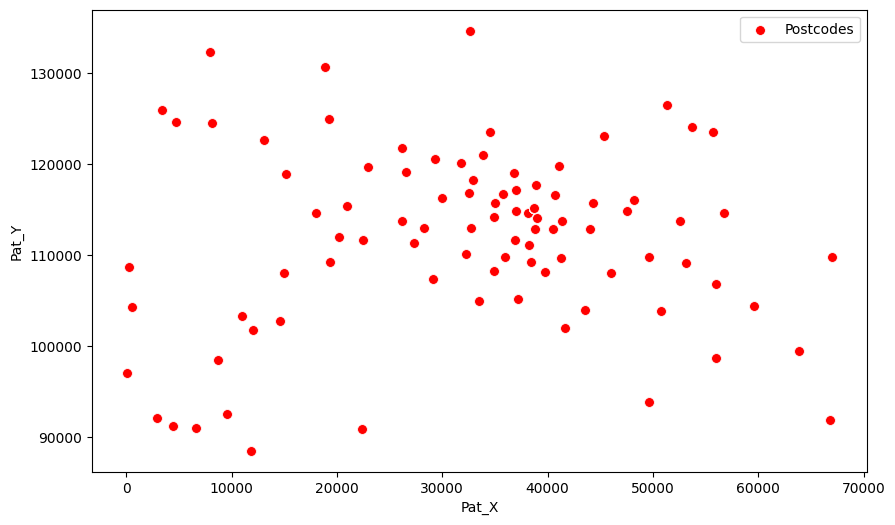

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Pat_X', y='Pat_Y', data=df, label='Postcodes', s=50, color='red')

### Voronoi map

This code generates a Voronoi map to visualize the spatial distribution of patient locations (Pat_X, Pat_Y), clipped to a bounding box, and overlays points representing patients with sizes proportional to their total time.

In [10]:
from scipy.spatial import Voronoi
from matplotlib.patches import Polygon
from shapely.geometry import Polygon as ShapelyPolygon, box  

Each patient location (Pat_X, Pat_Y) becomes a seed point for the Voronoi diagram.
The Voronoi diagram partitions the 2D space into regions, where each region contains the area closest to one of the points.

In [11]:
points = df[['Pat_X', 'Pat_Y']].values
vor = Voronoi(points)

Patient locations are plotted on top as points, and the size of each point reflects the total time associated with that patient.

C:\Users\glauc\AppData\Local\Temp\ipykernel_10788\388074429.py:30: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  poly_patch = Polygon(list(clipped_poly.exterior.coords), closed=True, color=color, alpha=0.5, edgecolor='black')
C:\Users\glauc\AppData\Local\Temp\ipykernel_10788\388074429.py:30: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  poly_patch = Polygon(list(clipped_poly.exterior.coords), closed=True, color=color, alpha=0.5, edgecolor='black')
C:\Users\glauc\AppData\Local\Temp\ipykernel_10788\388074429.py:30: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  poly_patch = Polygon(list(clipped_poly.exterior.coords), closed=True, color=color, alpha=0.5, edgecolor='black')
C:\Users\glauc\AppData\Local\Temp\ipykernel_10788\388074429.py:30: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  poly_

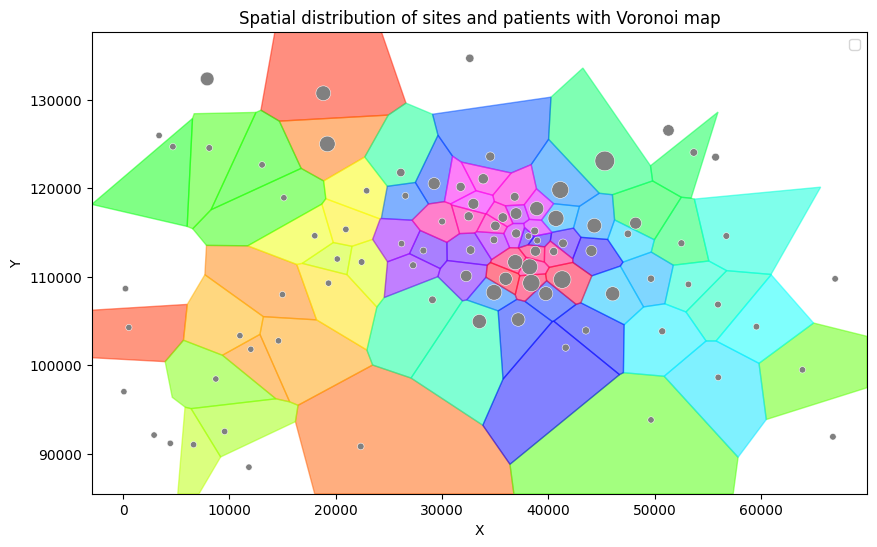

In [12]:
# Here we save the finite points and areas
finite_polygons = []
areas = []

# We determine the limits for the square around the postcodes
x_min, x_max = points[:, 0].min() - 3000, points[:, 0].max() + 3000
y_min, y_max = points[:, 1].min() - 3000, points[:, 1].max() + 3000

# To create a rectangular polygon with the given limits
bounding_box = box(x_min, y_min, x_max, y_max)

fig, ax = plt.subplots(figsize=(10, 6))
num_regions = len(vor.regions)
colors = sns.color_palette("hsv", n_colors=num_regions)  # Use a distinct color palette

for region_idx, region in enumerate(vor.regions):
    if len(region) > 0 and -1 not in region:  # Skip regions that go to infinity
        polygon = [vor.vertices[i] for i in region]  # Get the vertices of the polygon
        if len(polygon) > 0:  # If there are valid vertices
            # Calculate the Shapely polygon and its intersection with the bounding box
            poly_shapely = ShapelyPolygon(polygon)  
            if poly_shapely.is_valid:  # Check if the polygon is valid
                clipped_poly = poly_shapely.intersection(bounding_box)  # Intersect with the bounding box
                if not clipped_poly.is_empty:  # Check if the resulting polygon is not empty
                    finite_polygons.append(clipped_poly)  # Save the clipped polygon
                    poly_area = clipped_poly.area  # Calculate the area
                    areas.append(poly_area) 
                    # Draw the polygon on the map
                    color = colors[region_idx % len(colors)]  
                    poly_patch = Polygon(list(clipped_poly.exterior.coords), closed=True, color=color, alpha=0.5, edgecolor='black')
                    ax.add_patch(poly_patch)

# Add points to the Voronoi map
sns.scatterplot(
    x='Pat_X', 
    y='Pat_Y', 
    data=total_time_per_pat, 
    size='Total_Time', 
    sizes=(20, 200),  # Range of point sizes (min, max)
    color='grey', 
    legend=False, 
)

# Set the plot limits
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

# Set the title, legend, and display the plot
plt.title('Spatial distribution of sites and patients with Voronoi map')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Finding the Best Location for a New Site

We simulate 10000 observations among the postcode areas. We start by creating a new column Num_Points in the total_time_per_pat DataFrame. This variable will store the number of simulated points that correspond to the total waiting time for a particular postcode region. The idea is to represent the need for help in each region by simulating these points.

For each region (or postcode), the number of points is proportional to the total waiting time (Total_time). The higher the waiting time, the more points we simulate for that region. This simulation is used as a way to express how much help is needed: more waiting time means more points, and therefore a greater need for assistance.

The key focus here is the actual waiting time (Total_time) and not factors like the number of patients requesting help or the number of GPs in the area. The underlying assumption is that the longer people wait, the greater their need for help. If many people are waiting for a long time, it indicates a higher level of demand for assistance.

The number of simulated points is directly increased in regions where people are waiting longer. If a region has a high Total_time, the number of simulated points will increase accordingly, reflecting the greater need for help in that area. This increase in Num_Points helps to visually and quantitatively represent the severity of waiting times in each region.

In [13]:
total_time_sum = total_time_per_pat['Total_Time'].sum()
points_amount = 30000
total_time_per_pat['Num_Points'] = ((total_time_per_pat['Total_Time'] / total_time_sum) * points_amount).round().astype(int)
total_time_per_pat[['Pat_X', 'Pat_Y', 'Total_Time', 'Num_Points']]

,Pat_X,Pat_Y,Total_Time,Num_Points
0,85,97024,2433,6
1,231,108665,5723,14
2,551,104275,1183,3
3,2923,92120,3540,9
4,3394,125970,5308,13
...,...,...,...,...
86,56754,114614,15902,40
87,59585,104365,9480,24
88,63912,99490,6063,15
89,66780,91925,10480,26


### Saving and loading the data

In [14]:
import pickle
import os

# Make sure the folder is correct
os.makedirs('../data/MIU', exist_ok=True)

In [15]:
# Saving the data
with open('../data/MIU/voronoi_data.pkl', 'wb') as f:
    pickle.dump({
        'finite_polygons': finite_polygons,
        'areas': areas,
        'total_time_per_pat': total_time_per_pat
    }, f)

In [16]:
# Loading the data
with open('../data/MIU/voronoi_data.pkl', 'rb') as f:
    data = pickle.load(f)
    finite_polygons = data['finite_polygons']
    areas = data['areas']
    total_time_per_pat = data['total_time_per_pat']

### Points' simulation

This code performs a spatial check to identify rows in the total_time_per_pat DataFrame whose points fall outside the predefined polygons in the finite_polygons list. These rows are then saved to a new DataFrame (out_of_polygons_df). We have to store them to be able to add them in the map of simulated points

In [17]:
from shapely.geometry import Point

out_of_polygons = []

for _, row in total_time_per_pat.iterrows():
    point = Point(row['Pat_X'], row['Pat_Y'])  
    inside_polygon = False
    for polygon in finite_polygons:
        if polygon.contains(point): 
            inside_polygon = True
            break
    if not inside_polygon: 
        out_of_polygons.append(row) 

out_of_polygons_df = pd.DataFrame(out_of_polygons)
out_of_polygons_df['Num_Points'] = out_of_polygons_df['Num_Points'].astype(int)
out_of_polygons_df['Pat_X'] = out_of_polygons_df['Pat_X'].astype(int)
out_of_polygons_df['Pat_Y'] = out_of_polygons_df['Pat_Y'].astype(int)
out_of_polygons_df['Total_Time'] = out_of_polygons_df['Total_Time'].astype(int)

out_of_polygons_df.head(n = 12) #There are 12 patients sites outside the polygons

,Pat_X,Pat_Y,Total_Time,Num_Points
0,85,97024,2433,6
1,231,108665,5723,14
3,2923,92120,3540,9
4,3394,125970,5308,13
5,4449,91186,2914,7
8,7917,132362,347959,866
13,11844,88491,3816,9
39,32623,134695,71234,177
79,51311,126545,214422,534
83,55742,123521,50944,127


C:\Users\glauc\AppData\Local\Temp\ipykernel_10788\3801659253.py:9: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  poly_patch = Polygon(list(polygon.exterior.coords), closed=True, color=color, alpha=0.5, edgecolor='black')
C:\Users\glauc\AppData\Local\Temp\ipykernel_10788\3801659253.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


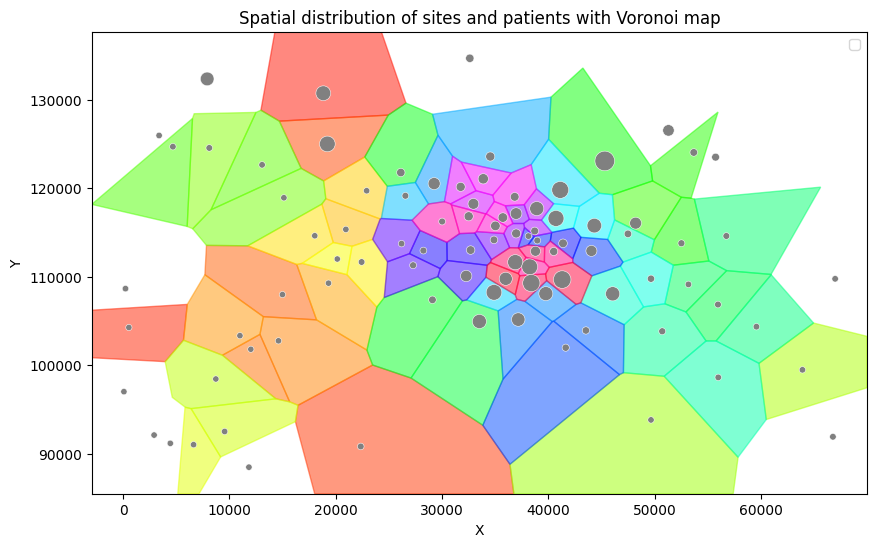

In [18]:
from matplotlib.patches import Polygon
fig, ax = plt.subplots(figsize=(10, 6))
num_regions = len(finite_polygons)
colors = sns.color_palette("hsv", n_colors=num_regions) 

for region_idx, polygon in enumerate(finite_polygons):
    if not polygon.is_empty:  
        color = colors[region_idx % len(colors)] 
        poly_patch = Polygon(list(polygon.exterior.coords), closed=True, color=color, alpha=0.5, edgecolor='black')
        ax.add_patch(poly_patch)

sns.scatterplot(
    x='Pat_X', 
    y='Pat_Y', 
    data=total_time_per_pat, 
    size='Total_Time', 
    sizes=(20, 200),  
    color='grey', 
    legend=False, 
    ax=ax
)

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

plt.title('Spatial distribution of sites and patients with Voronoi map')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

This code defines a function to generate random points uniformly distributed within each postcode area. First, it calculates the bounding box of the polygon, then generates random points within that box. If the point lies inside the polygon, it is added to the list of points. The function repeats this process until the specified number of points is generated. The script then iterates over each Voronoi region (polygon), uses the number of points to generate (Num_Points), and collects the points inside each region.

In [19]:
from shapely.geometry import Point, Polygon

# Function to generate uniformly distributed points inside a polygon
def generate_random_points_in_polygon(polygon, num_points):
    # Calculate the bounds of the polygon (bounding box)
    min_x, min_y, max_x, max_y = polygon.bounds
    
    points = []
    while len(points) < num_points:
        # Generate a random point within the bounding box
        random_point = Point(np.random.uniform(min_x, max_x), np.random.uniform(min_y, max_y))
        
        # Check if the point is inside the polygon
        if polygon.contains(random_point):
            points.append(random_point)
    
    return points

# List to store the generated points
all_generated_points = []

# Iterate over each Voronoi area and generate points based on Num_Points
for idx, polygon in enumerate(finite_polygons):
    num_points = total_time_per_pat.iloc[idx]['Num_Points']  # Number of points to generate
    shapely_polygon = Polygon(polygon)  # Create a Shapely polygon
    generated_points = generate_random_points_in_polygon(shapely_polygon, num_points)
    
    # Add the generated points to the list
    all_generated_points.extend(generated_points)

# Convert the generated points into a DataFrame
generated_points_df = pd.DataFrame({
    'X': [point.x for point in all_generated_points],
    'Y': [point.y for point in all_generated_points]
})


In [20]:
generated_points_list = []

for _, row in out_of_polygons_df.iterrows():
    num_points = row['Num_Points']
    for _ in range(num_points):
        new_row = pd.DataFrame({
            'X': [row['Pat_X']],
            'Y': [row['Pat_Y']]
        })
        generated_points_list.append(new_row)

new_points_df = pd.concat(generated_points_list, ignore_index=True)
generated_points_df = pd.concat([generated_points_df, new_points_df], ignore_index=True)
generated_points_df.head()

,X,Y
0,19556.394623,129438.665587
1,13633.860438,131464.385353
2,14136.009891,135623.590653
3,22654.021542,136731.642421
4,23542.884945,137597.172234


### Visualize the Generated Points

C:\Users\glauc\AppData\Local\Temp\ipykernel_10788\2180833388.py:10: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  poly_patch = mpl_polygon(list(polygon.exterior.coords), closed=True, color=color, alpha=0.5, edgecolor='black')


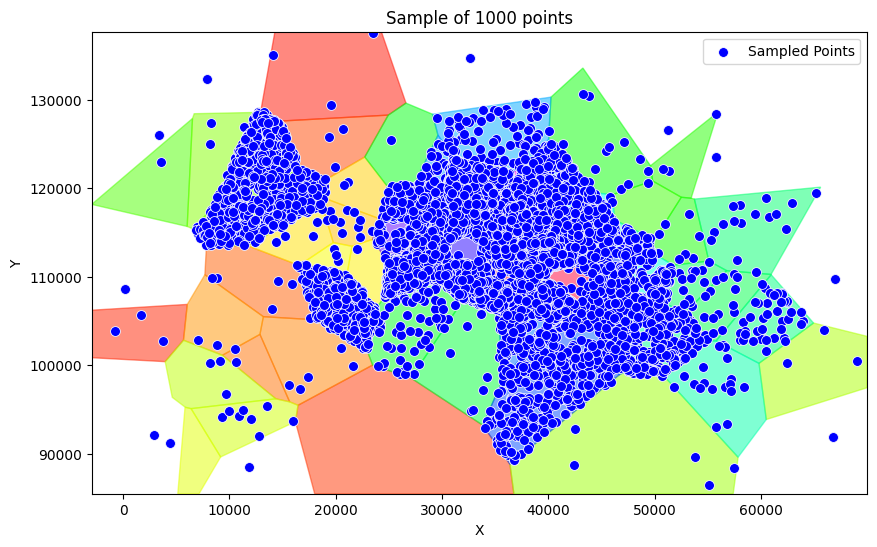

In [21]:
from matplotlib.patches import Polygon as mpl_polygon

sample_points = generated_points_df.sample(n=10000, random_state=4)

fig, ax = plt.subplots(figsize=(10, 6))

for region_idx, polygon in enumerate(finite_polygons):
    if not polygon.is_empty: 
        color = colors[region_idx % len(colors)]
        poly_patch = mpl_polygon(list(polygon.exterior.coords), closed=True, color=color, alpha=0.5, edgecolor='black')
        ax.add_patch(poly_patch)

sns.scatterplot(x='X', y='Y', data=sample_points, color='blue', s=50, ax=ax, label='Sampled Points')

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

plt.title('Sample of 1000 points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### Optimization Loop

This code calculates the total Euclidean distance between generated points and unique sites. First, it extracts unique site coordinates and generated point coordinates. It then calculates the Euclidean distance between each point and all sites. Each point is assigned to the site with the minimum distance. Next, it calculates the total distance for each site by summing the distances of assigned points. Finally, it computes the overall total distance for all sites.

In [22]:
from scipy.spatial.distance import cdist

# 1. Calculate the Euclidean distance between each point in generated_points_df and the unique points in Site_X and Site_Y
unique_sites = df[['Site_X', 'Site_Y']].drop_duplicates().values
points = generated_points_df[['X', 'Y']].values

# Calculate the Euclidean distance matrix
distances = cdist(points, unique_sites, metric='euclidean')

# 2. Assign each point to the site with the minimum distance
min_dist_indices = np.argmin(distances, axis=1)
generated_points_df['Assigned_Site'] = min_dist_indices

# 3. Sum the Euclidean distances for each site
total_dist_per_site = pd.DataFrame({'Site': np.arange(len(unique_sites)), 'Total_Dist': np.zeros(len(unique_sites))})

for i, site_idx in enumerate(min_dist_indices):
    total_dist_per_site.loc[site_idx, 'Total_Dist'] += distances[i, site_idx]

# 4. Calculate the total sum of the distances (total_dist)
total_dist = total_dist_per_site['Total_Dist'].sum()

print(f"Total Distance: {total_dist}")

Total Distance: 207040701.08557358


This code defines a function that calculates the total distance if a new site is added. It first takes the existing sites and generated points, then appends a new site at a random location. The distances between each point and all sites, including the new site, are calculated. Each point is assigned to the nearest site (including the new one). The function sums the distances for all sites, including the new one, and returns the total distance. This function will be used to evaluate the best location for a new site by minimizing the total distance.

In [23]:
# Find the new site that minimizes the total distance
# We will try adding a site at a random position and calculate the best site

def calculate_total_dist_with_new_site(new_site, points, unique_sites, min_dist_indices):
    # Calculate the distances with the new site
    extended_sites = np.vstack([unique_sites, new_site])
    distances_with_new_site = cdist(points, extended_sites, metric='euclidean')
    
    # Assign each point to the site with the minimum distance (including the new site)
    new_min_dist_indices = np.argmin(distances_with_new_site, axis=1)
    
    # Calculate the total sum of distances for all sites, including the new ones
    total_dist_with_new_site = np.zeros(len(extended_sites))
    for i, site_idx in enumerate(new_min_dist_indices):
        total_dist_with_new_site[site_idx] += distances_with_new_site[i, site_idx]
    
    return total_dist_with_new_site.sum()


We aim to find the best location for a new site by testing potential positions on a grid and calculating the total distance to existing sites. We first defines a function that calculates the total distance for all points to the nearest site, including a new candidate site. The grid of candidate positions is set up with a specified resolution, and for each grid point, it evaluates the total distance. The best position is selected when it results in the minimum total distance.

In [24]:
import numpy as np

# Function to calculate the total distance with a new site
def calculate_total_dist_with_new_site(new_site, points, unique_sites):
    all_sites = np.vstack([unique_sites, new_site])
    total_dist = 0
    for point in points:
        total_dist += np.min(np.linalg.norm(all_sites - point, axis=1))
    return total_dist

# Parametri del grid
num_points_per_axis = 100
x_grid = np.linspace(x_min, x_max, num_points_per_axis)
y_grid = np.linspace(y_min, y_max, num_points_per_axis)

# Preparazione
best_new_site = None
min_total_dist = total_dist
points = generated_points_df[['X', 'Y']].values
unique_sites = df[['Site_X', 'Site_Y']].drop_duplicates().values

# Calcolo quante iterazioni totali e ogni quanto stampare (10 messaggi)
# takes 1 second for 10 iterations.
total_iterations = num_points_per_axis**2
feedback_count = 10
report_interval = max(1, total_iterations // feedback_count)

iteration = 0

# Loop su tutto il grid
for x in x_grid:
    for y in y_grid:
        iteration += 1
        new_site_candidate = np.array([[x, y]])
        new_total_dist = calculate_total_dist_with_new_site(new_site_candidate, points, unique_sites)

        if new_total_dist < min_total_dist:
            best_new_site = new_site_candidate
            min_total_dist = new_total_dist

        # Messaggio di progresso ogni report_interval iterazioni (e all’ultima)
        if iteration % report_interval == 0 or iteration == total_iterations:
            print(f"Iterazione {iteration}/{total_iterations} – "
                  f"Best distance: {min_total_dist:.4f} at {best_new_site.flatten()}")

print(f"\nMiglior nuovo sito: {best_new_site.flatten()}")
print(f"Distanza totale ottimizzata: {min_total_dist:.4f}")

Iterazione 1000/10000 – Best distance: 198398732.1136 at [  3712.63636364 115547.84848485]
Iterazione 2000/10000 – Best distance: 188039450.2273 at [ 11076.67676768 117129.78787879]
Iterazione 3000/10000 – Best distance: 184791117.1431 at [ 18440.71717172 110274.71717172]
Iterazione 4000/10000 – Best distance: 177311965.7111 at [ 25804.75757576 110802.03030303]
Iterazione 5000/10000 – Best distance: 176650882.4441 at [ 27277.56565657 111329.34343434]
Iterazione 6000/10000 – Best distance: 176650882.4441 at [ 27277.56565657 111329.34343434]
Iterazione 7000/10000 – Best distance: 176650882.4441 at [ 27277.56565657 111329.34343434]
Iterazione 8000/10000 – Best distance: 176650882.4441 at [ 27277.56565657 111329.34343434]
Iterazione 9000/10000 – Best distance: 176650882.4441 at [ 27277.56565657 111329.34343434]
Iterazione 10000/10000 – Best distance: 176650882.4441 at [ 27277.56565657 111329.34343434]

Miglior nuovo sito: [ 27277.56565657 111329.34343434]
Distanza totale ottimizzata: 17665

### Save and Load the best location

In [25]:
np.savez('../data/MIU/results/best_site_data.npz', best_new_site=best_new_site, min_total_dist=min_total_dist)
print("Variables 'best_new_site' and 'min_total_dist' successfully saved in 'best_site_data.npz'")

Variables 'best_new_site' and 'min_total_dist' successfully saved in 'best_site_data.npz'


In [26]:
data = np.load('../data/MIU/results/best_site_data.npz')
best_new_site = data['best_new_site']
min_total_dist = data['min_total_dist']
print(f"Variables successfully loaded\n- Best New Site: {best_new_site}\n- Min Total Dist: {min_total_dist}")

Variables successfully loaded
- Best New Site: [[ 27277.56565657 111329.34343434]]
- Min Total Dist: 176650882.44408014


### Average Distance to Nearest A&E

In [27]:
print(f"The average distance to the nearest A&E is: {min_total_dist/points_amount}")

The average distance to the nearest A&E is: 5888.3627481360045


### Evaluate and Visualize the Best Location for the New Site

C:\Users\glauc\AppData\Local\Temp\ipykernel_10788\1707305678.py:16: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  poly_patch = mpl_polygon(list(polygon.exterior.coords), color=color, alpha=0.5, edgecolor='black')


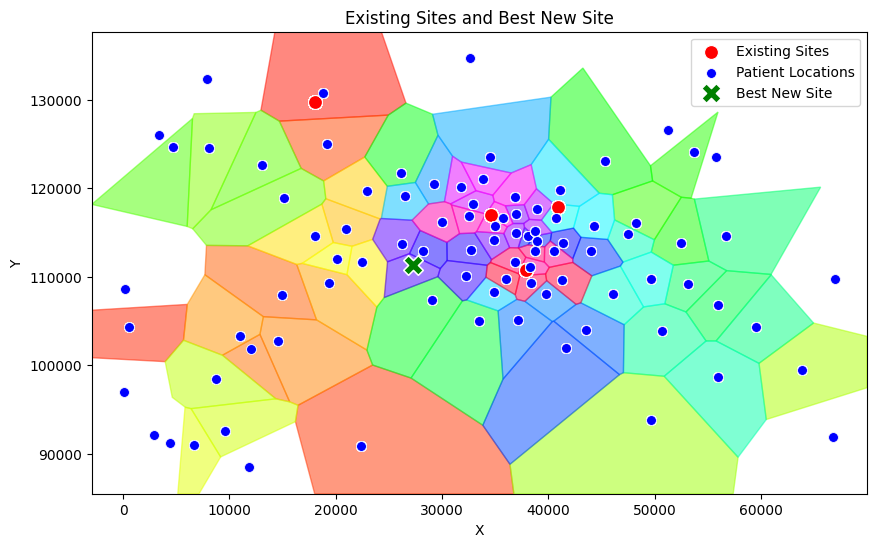

In [28]:
from matplotlib.patches import Polygon as mpl_polygon

# Create a temporary DataFrame for the Best New Site
best_new_site_df = pd.DataFrame({
    'Site_X': [best_new_site[0][0]],  # X coordinate of the Best New Site
    'Site_Y': [best_new_site[0][1]]   # Y coordinate of the Best New Site
})

fig, ax = plt.subplots(figsize=(10, 6))

# Add Voronoi polygons for existing sites
for region_idx, polygon in enumerate(finite_polygons):
    if not polygon.is_empty:  # Use the is_empty method to check if the polygon is empty
        color = colors[region_idx % len(colors)]
        # Create the polygon using Polygon from Matplotlib, passing the coordinates
        poly_patch = mpl_polygon(list(polygon.exterior.coords), color=color, alpha=0.5, edgecolor='black')
        ax.add_patch(poly_patch)

# Add the existing sites
sns.scatterplot(x='Site_X', y='Site_Y', data=df, color='red', s=100, ax=ax, label='Existing Sites')

# Add the postcodes (patient locations)
sns.scatterplot(x='Pat_X', y='Pat_Y', data=df, color='blue', s=50, ax=ax, label='Patient Locations')

# Add the Best New Site (optimized)
sns.scatterplot(x='Site_X', y='Site_Y', data=best_new_site_df, color='green', s=200, ax=ax, label='Best New Site', marker='X')

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
plt.title('Existing Sites and Best New Site')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [29]:
# Add the Best New Site to the list of existing sites
all_sites = np.vstack([unique_sites, best_new_site])  # For each point, find the closest site and count how many points are associated with each site

# Initialize a dictionary to count points associated with each site
site_point_counts = {f"Site_{i}": 0 for i in range(len(all_sites))}

# Iterate over each point and calculate the closest site
for i, point in enumerate(points):
    distances = np.linalg.norm(all_sites - point, axis=1)  # Calculate the distances of a point to all the sites
    closest_site_index = np.argmin(distances)  # Find the index of the closest site
    site_point_counts[f"Site_{closest_site_index}"] += 1  # Increment the count for the corresponding site

# Print the number of points associated with each site
print("\n--- Number of points associated with each site ---")
for site_idx, (site_name, point_count) in enumerate(site_point_counts.items()):
    site_coordinates = all_sites[site_idx]
    if site_name == "Site_11":
        print(f"{site_name} (New Site) (X={site_coordinates[0]:.2f}, Y={site_coordinates[1]:.2f}) -> {point_count} points")
        point_percentage = point_count
    else:
        print(f"{site_name} (X={site_coordinates[0]:.2f}, Y={site_coordinates[1]:.2f}) -> {point_count} points")


--- Number of points associated with each site ---
Site_0 (X=37920.00, Y=110782.00) -> 10660 points
Site_1 (X=40877.00, Y=117868.00) -> 4147 points
Site_2 (X=34629.00, Y=117035.00) -> 7278 points
Site_3 (X=18043.00, Y=129799.00) -> 3182 points
Site_4 (X=27277.57, Y=111329.34) -> 5501 points


In [30]:
print(f"By itself, the new site would be the reference point for {point_percentage/points_amount*100} percent of the demand present in all the 91 sites")

NameError: name 'point_percentage' is not defined

In [ ]:
# %% 
# ### Calcolo del miglioramento assoluto e relativo

# total_dist è la distanza totale senza il nuovo sito
# min_total_dist è la distanza ottimizzata con il nuovo sito

# 1. Riduzione assoluta della distanza
absolute_reduction = total_dist - min_total_dist
print(f"Riduzione assoluta della distanza: {absolute_reduction:.4f}")

# 2. Miglioramento proporzionale (frazione)
relative_improvement = absolute_reduction / total_dist
print(f"Miglioramento proporzionale: {relative_improvement:.4}")

# Se preferisci il valore percentuale direttamente:
percent_improvement = relative_improvement * 100
print(f"Miglioramento percentuale: {percent_improvement:.2f}%")

Riduzione assoluta della distanza: 21849875.8786
Miglioramento proporzionale: 0.1241
Miglioramento percentuale: 12.41%


In [ ]:
# %% 
# ### Calcolo del miglioramento del waiting time medio

# 1. Calcola il waiting time medio originale (dopo la trasformazione numerica)
original_mean_wait = df['Wait_Time'].mean()
print(f"Waiting time medio originale: {original_mean_wait:.2f} minuti")

# 2. Applica l’abbassamento proporzionale
# percent_improvement è già un valore in [0,1], es. 0.1234 per un miglioramento del 12.34%
new_mean_wait = original_mean_wait * (1 - relative_improvement)
print(f"Nuovo waiting time medio stimato: {new_mean_wait:.2f} minuti")

# 3. Riduzione assoluta e percentuale del waiting time medio
absolute_wait_reduction = original_mean_wait - new_mean_wait
relative_wait_reduction = absolute_wait_reduction / original_mean_wait

print(f"Riduzione assoluta del waiting time medio: {absolute_wait_reduction:.2f} minuti")
print(f"Riduzione percentuale del waiting time medio: {relative_wait_reduction:.2%}")


Waiting time medio originale: 179.53 minuti
Nuovo waiting time medio stimato: 157.24 minuti
Riduzione assoluta del waiting time medio: 22.29 minuti
Riduzione percentuale del waiting time medio: 12.41%
